# Time Series
![](https://i.ytimg.com/vi/coMhteW-sLU/maxresdefault.jpg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-a-time-series?" data-toc-modified-id="What-is-a-time-series?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is a time series?</a></span></li><li><span><a href="#Time-Series-Analysis" data-toc-modified-id="Time-Series-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time Series Analysis</a></span><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#Time-intervals" data-toc-modified-id="Time-intervals-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Time intervals</a></span></li><li><span><a href="#Pandas-DateTime-Range" data-toc-modified-id="Pandas-DateTime-Range-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Pandas DateTime Range</a></span></li></ul></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#Moving-Average" data-toc-modified-id="Moving-Average-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Moving Average</a></span></li></ul></li><li><span><a href="#Decomposing-a-time-series" data-toc-modified-id="Decomposing-a-time-series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Decomposing a time series</a></span><ul class="toc-item"><li><span><a href="#Trend" data-toc-modified-id="Trend-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Trend</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Seasonality</a></span></li><li><span><a href="#Cycles" data-toc-modified-id="Cycles-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Cycles</a></span></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Residuals</a></span></li><li><span><a href="#Additive-decomposition" data-toc-modified-id="Additive-decomposition-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Additive decomposition</a></span></li><li><span><a href="#Multiplicative-decomposition" data-toc-modified-id="Multiplicative-decomposition-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Multiplicative decomposition</a></span></li></ul></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stationarity</a></span><ul class="toc-item"><li><span><a href="#Augmented-Dickey-Fuller-test" data-toc-modified-id="Augmented-Dickey-Fuller-test-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Augmented Dickey Fuller test</a></span></li></ul></li><li><span><a href="#Auto-Correlation-Function" data-toc-modified-id="Auto-Correlation-Function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Auto Correlation Function</a></span><ul class="toc-item"><li><span><a href="#Lag-Plot" data-toc-modified-id="Lag-Plot-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Lag Plot</a></span></li></ul></li><li><span><a href="#Further-Resources" data-toc-modified-id="Further-Resources-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Further Resources</a></span></li></ul></div>

## What is a time series?
>A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of [discrete](https://en.wikipedia.org/wiki/Continuous_or_discrete_variable)-time data.

_Source: [Wikipedia](https://en.wikipedia.org/wiki/Time_series)_

**Examples:**
- Stock Prices
- Weather data (temperature, humidity, etc..)
- Visitor to a webpage, Youtube views
- Power generation
- Audio
- Video

## Time Series Analysis
### Motivation
- **Forecasting** (Predicting)
- Signal Processing
- Pattern Recognition and Anomaly Detection

### Time intervals
When studying a time-series, the frequency (intervals) in which the data is colected is very important. 

Luckily, pandas has a couple of tools to help us out with it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Pandas DateTime Range
```python
pd.date_range(start, end, periods, freq)
```

In [2]:
pd.date_range("28/04/2021", periods=7, freq="D")

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04'],
              dtype='datetime64[ns]', freq='D')

**Frequency Aliases**

Some of the most common are:

- "D" : Day
- "W" : Week
- "H" : Hour
- "T" : Minute
- "S" : Second
- "L" : Milisecond

Of course, there are many [more](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases).

In [3]:
pd.date_range("28/04/2021", "05/05/2021", periods=8)

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05'],
              dtype='datetime64[ns]', freq=None)

If we do not define the frequency beforehand, we can infer it!

It will be used when setting the dates as the index for our data.

In [4]:
dates = pd.date_range("28/04/2021", "28/05/2021", periods=31)
freq = pd.infer_freq(dates)
print(freq)

D


In [5]:
dates.freq = freq

In [6]:
dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28'],
              dtype='datetime64[ns]', freq='D')

**Let's mock up some data**

In [7]:
len(dates)

31

In [8]:
df = pd.DataFrame(index=dates)
df["values"] = np.random.randint(500, 3000, len(dates))
df.head()

,values
2021-04-28,2731
2021-04-29,1652
2021-04-30,1558
2021-05-01,1337
2021-05-02,2136


<AxesSubplot:>

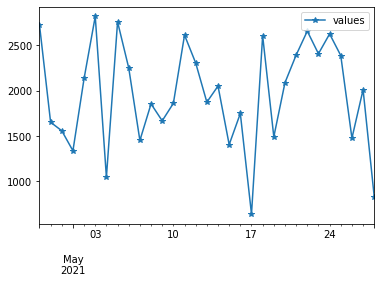

In [12]:
df.plot(marker = "*")

Of course, not all real world data is this random

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [14]:
df.index = pd.to_datetime(df["date"])

In [15]:
df.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [19]:
df.index.isocalendar()

,year,week,day
date,,,
1991-07-01,1991,27,1
1991-08-01,1991,31,4
1991-09-01,1991,35,7
1991-10-01,1991,40,2
1991-11-01,1991,44,5
...,...,...,...
2008-02-01,2008,5,5
2008-03-01,2008,9,6
2008-04-01,2008,14,2


And after infering the frequency

In [16]:
# To plot something automatically with pandas, we need to put it as index. 
# Therefore, we put the date as index
df.index.freq = pd.infer_freq(df.index)
df.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq='MS')

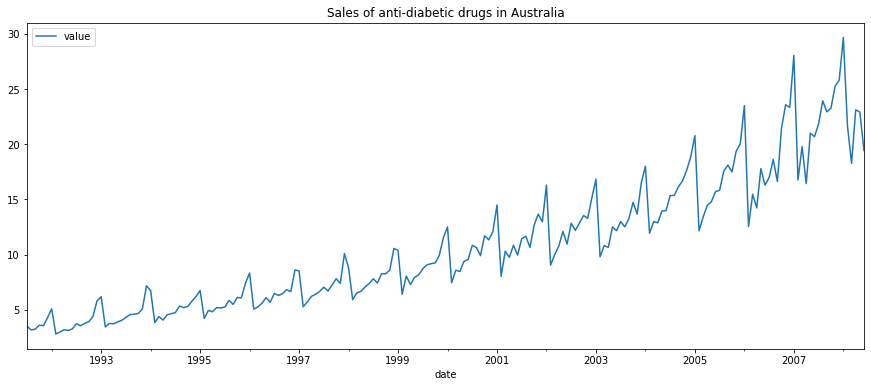

In [20]:
df.plot(figsize=(15,6), title="Sales of anti-diabetic drugs in Australia");

## Exploratory Analysis

We begin seeing some patterns and characteristics on our data.

Let's check out the average of our values.

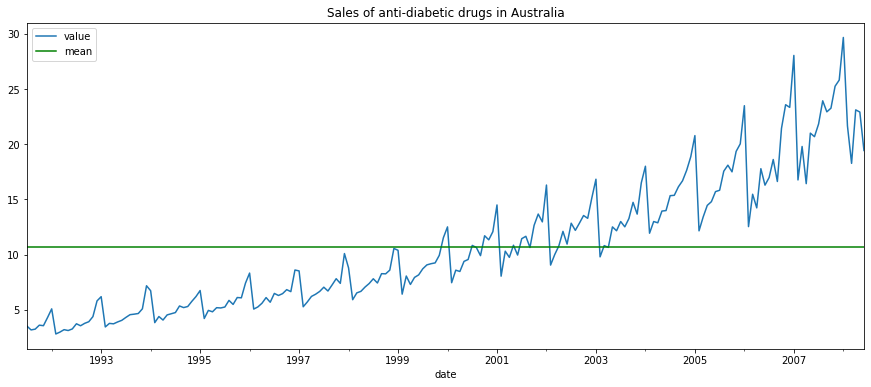

In [21]:
df.plot(figsize=(15,6))
plt.title("Sales of anti-diabetic drugs in Australia")
plt.axhline(df.value.mean(), c="g", label="mean")
plt.legend();

### Moving Average

**Rolling Window**

The average of all values does not tells us much, but let's se how that average behaves through time.

In [22]:
df.rolling(window=12)

Rolling [window=12,center=False,axis=0]

In [23]:
df.rolling(window=12).mean()

,value
date,
1991-07-01,NaN
1991-08-01,NaN
1991-09-01,NaN
1991-10-01,NaN
1991-11-01,NaN
...,...
2008-02-01,22.686363
2008-03-01,22.559045
2008-04-01,23.115743


As you can see, there are no values for the average on the 12 first points, because there is no window from previous 12 values there.

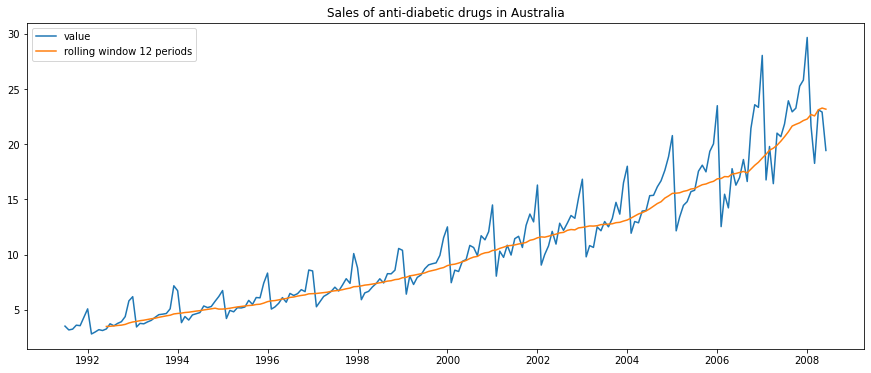

In [24]:
plt.figure(figsize=(15,6))
plt.title("Sales of anti-diabetic drugs in Australia")

plt.plot(df["value"], label="value")

#plt.axhline(df.value.mean(), c="g", label="mean")

# We use the `.rolling` method to define windows in which the the average is calculated.
plt.plot(df.rolling(window=12).mean(), label="rolling window 12 periods")

plt.legend();

What about the 6 month moving average and the 24 month moving average?

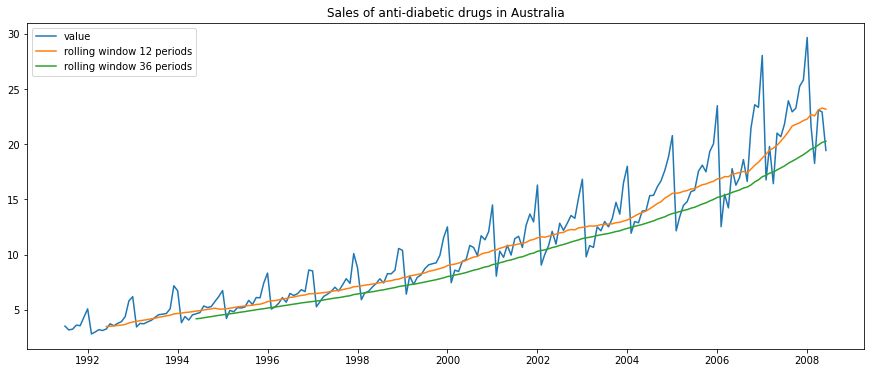

In [25]:
plt.figure(figsize=(15,6))
plt.title("Sales of anti-diabetic drugs in Australia")

plt.plot(df["value"], label="value")

#plt.axhline(df.value.mean(), c="g", label="mean")

# We use the `.rolling` method to define windows in which the the average is calculated.
plt.plot(df.rolling(window=12).mean(), label="rolling window 12 periods")
plt.plot(df.rolling(window=36).mean(), label="rolling window 36 periods")

plt.legend();

Let's try a different way of calculating a Moving Average. 

Instead of keeping a fix size window and moving it, we can try increasing the size of our window each time we move forward.

**Expanding Window**

In [26]:
df.head(10)

,date,value
date,,
1991-07-01,1991-07-01,3.526591
1991-08-01,1991-08-01,3.180891
1991-09-01,1991-09-01,3.252221
1991-10-01,1991-10-01,3.611003
1991-11-01,1991-11-01,3.565869
1991-12-01,1991-12-01,4.306371
1992-01-01,1992-01-01,5.088335
1992-02-01,1992-02-01,2.814520
1992-03-01,1992-03-01,2.985811


In [27]:
df.expanding().mean()

,value
date,
1991-07-01,3.526591
1991-08-01,3.353741
1991-09-01,3.319901
1991-10-01,3.392676
1991-11-01,3.427315
...,...
2008-02-01,10.489734
2008-03-01,10.528416
2008-04-01,10.590690


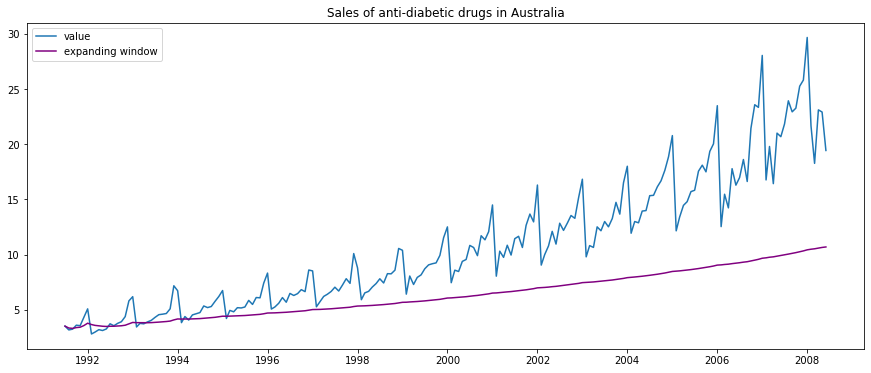

In [28]:
plt.figure(figsize=(15,6))
plt.title("Sales of anti-diabetic drugs in Australia")

plt.plot(df["value"], label="value")

#plt.axhline(df.value.mean(), c="g", label="mean")

#plt.plot(df.rolling(window=12).mean(), label="rolling window")

plt.plot(df.expanding().mean(), c="purple", label="expanding window")

plt.legend();

Either way we look at it, we can see a tendency that the sales increase over time.

## Decomposing a time series
There are `four` components for a time series.

If we separate the different components of a time series, the way the average changes through time is called the `trend` and it represents the way values behave on a "long term" perspective.

### Trend
How the average changes through time.
On our example, there is a clear increasing trend.

Not all time series are like that.

Time series whose average doesn't change through time are called `stationary`. More on stationarity later.

The trend, however, does not account for all the changes in our data. There are ups and downs that repeat in some patterns. This can be attributed to one of two things.

### Seasonality
Patterns of peaks and droughts that repeat within a regular interval are attributed to `seasons`. These intervals usually relate to a time pattern of the calendar (yearly, bi-yearly, monthly, daily, weekly, hourly, etc.)

### Cycles
Patterns repeated in uneven intervals or that do not relate to a period of the calendar.

In general, they have a longer interval than seasons and a larger amplitude of variation.

Therefore, cycles are more difficult to predict than seasons. (Remember that real world data are susceptible to a lot of unpredictable influences)

### Residuals
Variations that do not repeat in any sort of pattern are called `residuals` or `noise`.


Let's se a tool to decompose our data.

### Additive decomposition

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

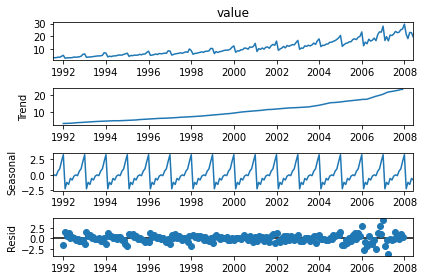

In [30]:
res = seasonal_decompose(df.value, model="additive")
res.plot();

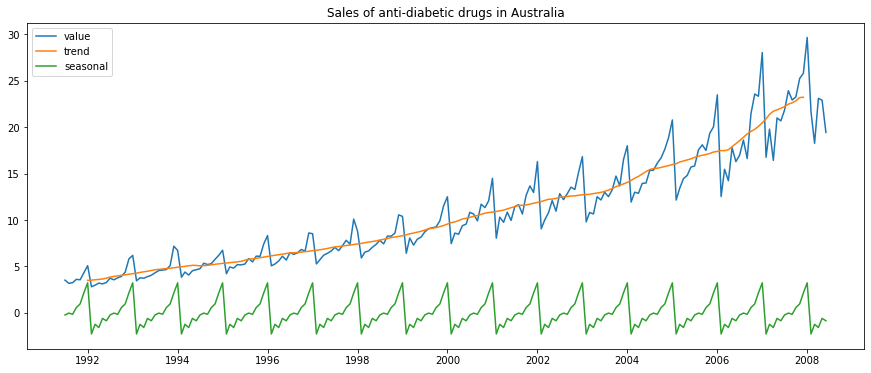

In [31]:
plt.figure(figsize=(15,6))
plt.title("Sales of anti-diabetic drugs in Australia")

plt.plot(df["value"], label="value")

plt.plot(res.trend, label="trend")

plt.plot(res.seasonal, label="seasonal")

# plt.plot(res.resid, label="residual")

plt.legend();

It is called an `additive` model because if you sum the parts up, you get the original data back.

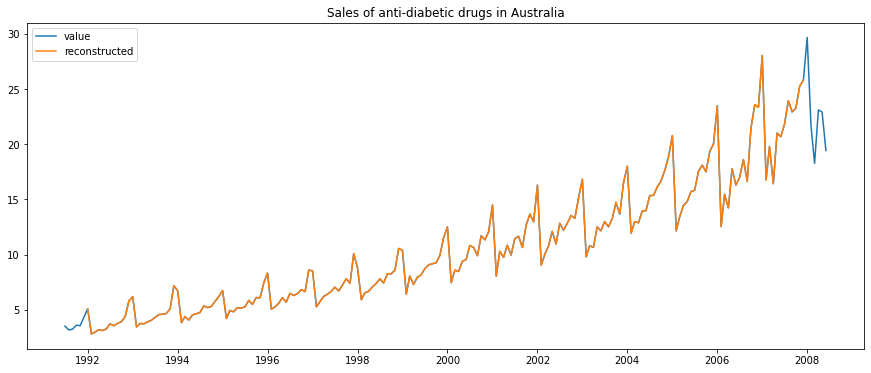

In [32]:
plt.figure(figsize=(15,6))
plt.title("Sales of anti-diabetic drugs in Australia")
plt.plot(df["value"], label="value")
plt.plot(res.trend + res.seasonal + res.resid, label="reconstructed")
plt.legend();

In [33]:
x = np.linspace(0, 8*np.pi, 49)
# np.sin takes an angle in radian.
# 360° == 2π rad
y = np.sin(x) + 1 

In [34]:
sin = pd.DataFrame(y, index=pd.date_range("01/01/2021", periods=49, freq="MS"))

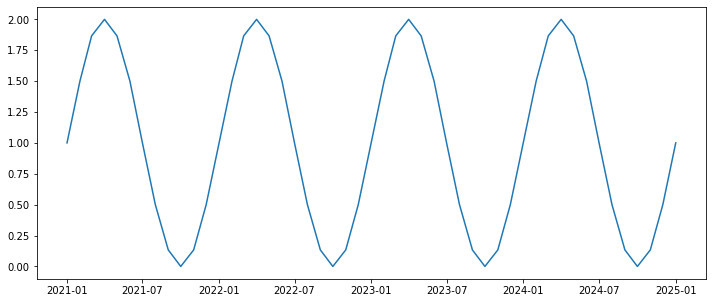

In [35]:
plt.figure(figsize=(12,5))
plt.plot(sin)

In [36]:
sin.index

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
               '2025-01-01'],
              dtype='datetime64[ns]', freq='MS')

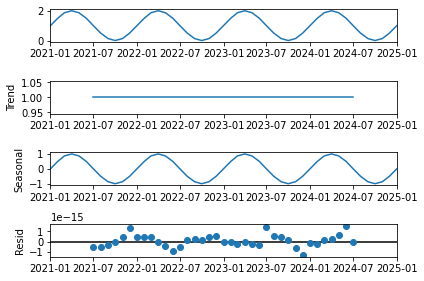

In [37]:
seasonal_decompose(sin).plot();

Being such a deterministic pattern, residuals are very little (1e-15)

### Multiplicative decomposition

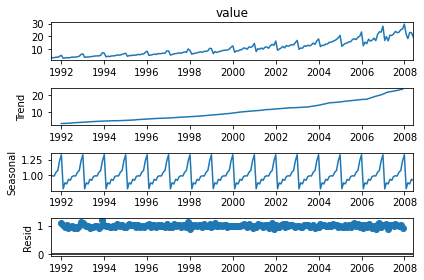

In [38]:
res = seasonal_decompose(df.value, model="multiplicative")
res.plot();

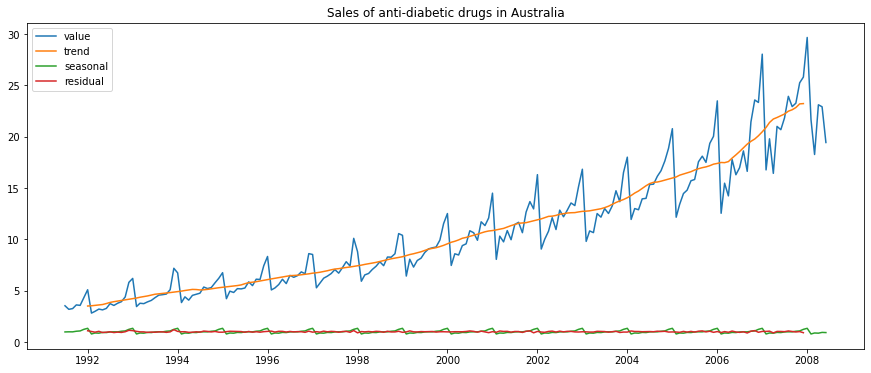

In [39]:
plt.figure(figsize=(15,6))
plt.title("Sales of anti-diabetic drugs in Australia")

plt.plot(df["value"], label="value")

plt.plot(res.trend, label="trend")

plt.plot(res.seasonal, label="seasonal")

plt.plot(res.resid, label="residual")

plt.legend();

It is called an `multiplicative` model because if you multiply the parts up, you get the original data back.

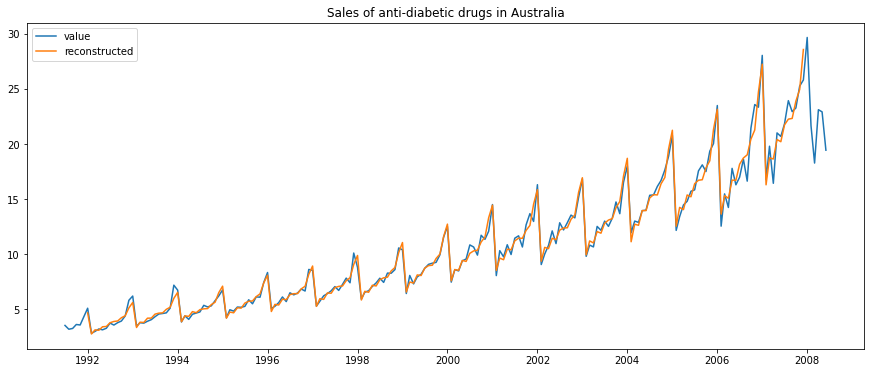

In [41]:
plt.figure(figsize=(15,6))
plt.title("Sales of anti-diabetic drugs in Australia")
plt.plot(df["value"], label="value")
plt.plot(res.trend * res.seasonal, label="reconstructed")
plt.legend();

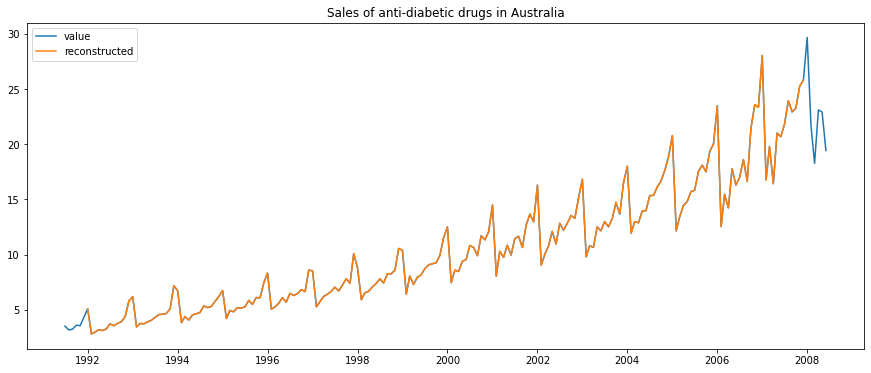

In [40]:
# Multiplying it also by the residual, we get the same result
plt.figure(figsize=(15,6))
plt.title("Sales of anti-diabetic drugs in Australia")
plt.plot(df["value"], label="value")
plt.plot(res.trend * res.seasonal * res.resid, label="reconstructed")
plt.legend();

## Stationarity

- **Stationary**

Mean is constant over time (there is no trend)

Variance is constant

- **Weakly stationary**

No trend

Variance is not constant

- **Non-Stationary**

There is a trend, ascending or descending

----

Sometimes it is not very clear to see if there is a clear trend or not, therefore we can use a statistical test to check whether or not a series is Stationary.

### Augmented Dickey Fuller test

When doing a statistical test, we have a null hypothesis and an alternative hypothesis and we check some test statistic against critical values to see whether we keep the null hypothesis or reject it and accept the alternative.

- $H_0$ (Null Hypothesis) : The series is **not** stationary and there is a statistical significant trend

- $H_A$ (Alternative Hypothesis) : The series is Stationary

In [42]:
# This checks if the series is stationary.
from statsmodels.tsa.stattools import adfuller
res = adfuller(df["value"])
res

(3.1451856893067434,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

As we can see, there are a lot of different values resulting from our test. Lets separate them to look at the part that matters to us.

In [44]:
adf, pvalue, usedlag, nobs, critical_values, icbest = res

In [45]:
# Our test statistic
adf

3.1451856893067434

In [46]:
# The critical values for different confidence intervals (How strict we are)
critical_values

{'1%': -3.465620397124192,
 '5%': -2.8770397560752436,
 '10%': -2.5750324547306476}

In [47]:
res = adfuller(sin)
res

(-501861946137881.6,
 0.0,
 6,
 42,
 {'1%': -3.596635636000432,
  '5%': -2.933297331821618,
  '10%': -2.6049909750566895},
 -2444.302839544954)

Since our adf is greater than any of the critical values, we accept the null hypothesis.

Therefore, as previously seen, even on a 1% confidence level, we can affirm that our data is `not` stationary.

> Alternatively, we can look at the p-value and compare it with a predefine confidence interval alpha (usually 5%).
>
> If p_value > alpha (0.05), we accept the null hypothesis.

In [48]:
pvalue

1.0

## Auto Correlation Function
In the broadest sense [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related.

[Autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation), also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay.

In [59]:
data_t.head()

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
Freq: MS, Name: value, dtype: float64

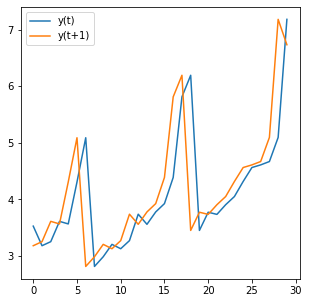

In [53]:
data_t = df["value"][:-1]
data_t_plus_1 = df["value"][1:]
plt.figure(figsize=(5,5))
plt.plot(data_t[:30].values, label="y(t)")
plt.plot(data_t_plus_1[:30].values, label="y(t+1)")
plt.legend();

### Lag Plot

We can have an idea of autocorrelation by looking at a lag plot.

In [61]:
data_t_plus_1.head()

date
1991-10-01    3.611003
1991-11-01    3.565869
1991-12-01    4.306371
1992-01-01    5.088335
1992-02-01    2.814520
Freq: MS, Name: value, dtype: float64

No handles with labels found to put in legend.


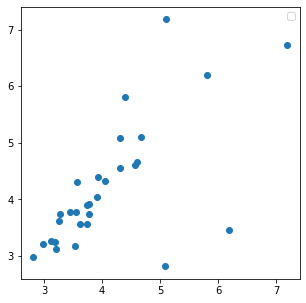

In [54]:
plt.figure(figsize=(5,5))
plt.scatter(data_t[:30].values, data_t_plus_1[:30])
plt.legend();

In [55]:
np.corrcoef(data_t, data_t_plus_1)

array([[1.        , 0.92888744],
       [0.92888744, 1.        ]])

Very strong correlation: from NOW, we can have an idea of what is happening in 1 periods time

What about correlation after 3 periods of time?

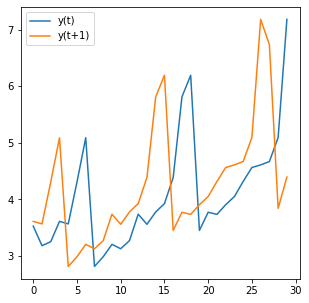

In [56]:
data_t = df["value"][:-3]
data_t_plus_1 = df["value"][3:]
plt.figure(figsize=(5,5))
plt.plot(data_t[:30].values, label="y(t)")
plt.plot(data_t_plus_1[:30].values, label="y(t+1)")
plt.legend();

No handles with labels found to put in legend.


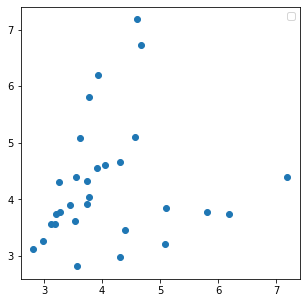

In [57]:
plt.figure(figsize=(5,5))
plt.scatter(data_t[:30].values, data_t_plus_1[:30])
plt.legend();

In [ ]:
np.corrcoef(data_t, data_t_plus_1)

Still strong correlation: from NOW, we can have an idea of what is happening in 3 periods time

**Regression Signal vs Time**

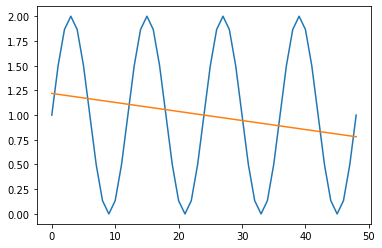

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.expand_dims(x, -1),y)
y_pred = lr.predict(np.expand_dims(x,-1))

plt.plot(y)
plt.plot(y_pred)

**Regression Signal f(t) vs f(t+1)**

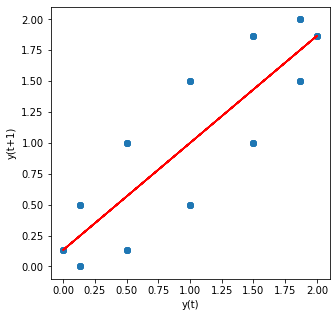

In [63]:
lag = 1
y_t = y[1:]
y_plus = y[:-1]

plt.figure(figsize=(5,5))
plt.scatter(y_t,y=y_plus)
plt.xlabel("y(t)")
plt.ylabel(f"y(t+{lag})")

lr = LinearRegression()
lr.fit(np.expand_dims(y_t,-1),y_plus)
y_pred = lr.predict(np.expand_dims(y_t,-1))

plt.plot(y[1:],y_pred,c="red")

In [64]:
lr.predict([[-1]])

array([-0.73205081])

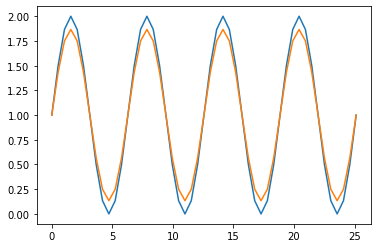

In [65]:
y_pred = lr.predict(np.expand_dims(y,-1))
plt.plot(x,y)
plt.plot(x,y_pred)

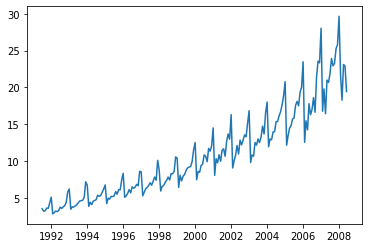

In [66]:
data_t = df["value"][:-1]
data_t_plus_1 = df["value"][1:]
plt.plot(df["value"])

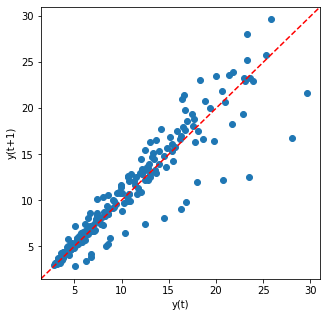

In [67]:
data_t = df["value"][:-1]
data_t_plus_1 = df["value"][1:]
plt.figure(figsize=(5,5))
plt.scatter(x=data_t,y=data_t_plus_1)
plt.xlabel("y(t)")
plt.ylabel("y(t+1)")
plt.plot([0, 1], [0, 1], ls="--", c="r", transform=plt.gca().transAxes);
## Alternatively
## pd.plotting.lag_plot(data_t)

**Linear Regression Sales vs time**

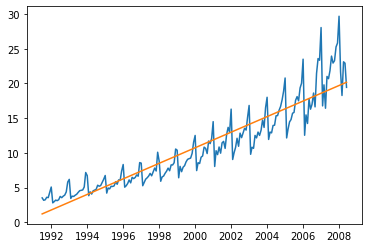

In [68]:
lr = LinearRegression()
lr.fit(df.index.astype(int).to_frame(),df["value"])
y_pred = lr.predict(df.index.astype(int).to_frame())

plt.plot(df["value"])
plt.plot(df.index,y_pred)

In [69]:
from sklearn.metrics import mean_squared_error as mse
mse(y_pred,df["value"])

5.1198824621362355

**Linear Regression Sales y(t) vs y(t-1)**


Text(0, 0.5, 'y(t+1)')

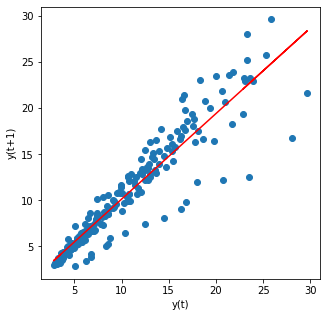

In [70]:
lr = LinearRegression()
data_t = df["value"][:-1]
data_t_plus_1 = df["value"][1:]
lr.fit(data_t.to_frame(),data_t_plus_1)
y_pred = lr.predict(data_t.to_frame())

plt.figure(figsize=(5,5))
plt.scatter(x=data_t,y=data_t_plus_1)
plt.plot(data_t,y_pred, c="r")
plt.xlabel("y(t)")
plt.ylabel("y(t+1)")

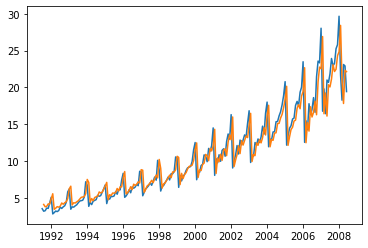

In [71]:
plt.plot(df["value"])
plt.plot(df.index[1:], y_pred)

In [72]:
### Separating test data
lr = LinearRegression()
## Test Data
y_true = df["value"][-10:]
# Traning Data
data_t = df["value"][:-11]
data_t_plus_1 = df["value"][1:-10]
# Training model
lr.fit(data_t.to_frame(),data_t_plus_1)

LinearRegression()

In [73]:
previous = [[data_t[-1]]]
y_pred = []
for _ in range(10):
    predict = lr.predict(previous)[0]
    y_pred.append(predict)
    previous = [[predict]]

In [74]:
y_pred

[21.116056767603673,
 20.447205907627275,
 19.824862013759393,
 19.24579133386477,
 18.706984967131444,
 18.205643229564632,
 17.739161106589073,
 17.305114717170348,
 16.90124871912158,
 16.52546459015241]

In [ ]:
plt.plot(data_t)
plt.plot(df.index[-10:],y_pred)
plt.plot(y_true)

In [75]:
mse(y_pred,y_true)

29.419916699446418

The closer it looks to a perfect diagonal, the higher the autocorrelation.

We can measure the value with `np.corrcoef`

In [76]:
np.corrcoef(data_t,data_t_plus_1)

array([[1.        , 0.91740643],
       [0.91740643, 1.        ]])

In [77]:
np.corrcoef(data_t,data_t_plus_1)[0][1]

0.9174064324470304

We have however only checked the correlation with the previous value, how would it be with `t+2`?

In [79]:
def autocorr(data, lag):
    # Slice the relevant subseries based on the lag
    y_minus = data[:(len(data)-lag)]
    y = data[lag:]
    # Subtract the subseries means
    sum_product = np.sum((y_minus-np.mean(y_minus))*(y-np.mean(y)))
    # Normalize with the subseries stds
    return sum_product / (len(y) * np.std(y_minus) * np.std(y))

In [82]:
ac = [autocorr(df["value"],i) for i in range(1,25)]
ac

[0.9910563284737696,
 0.9763244862276192,
 0.9609005196168223,
 0.952775131687065,
 0.9396288721951292,
 0.9078749670665981,
 0.8863358704817154,
 0.8625571165251823,
 0.8428292311543059,
 0.8234662507133124,
 0.8008282311949805,
 0.7825521850102483,
 0.7669030813903279,
 0.7497998644454958,
 0.7405334963972952,
 0.7257733885338437,
 0.716613036729267,
 0.678637263409497,
 0.656089810377454,
 0.627092128484766,
 0.6040781527546621,
 0.5913934107514525,
 0.5747197703066456,
 0.5613563090032514]

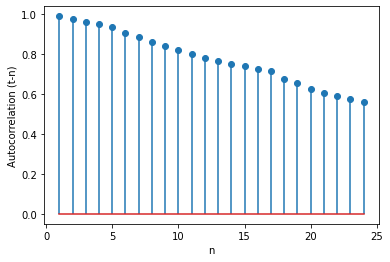

In [81]:
plt.stem(range(1,25),ac)
plt.ylabel("Autocorrelation (t-n)")
plt.xlabel("n");

**Using Statsmodels**

In [83]:
from statsmodels.graphics.tsaplots import plot_acf

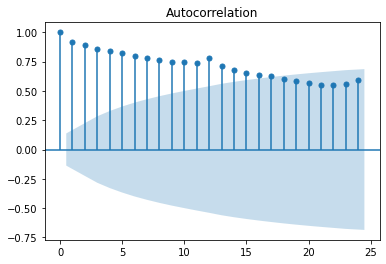

In [84]:
plot_acf(df["value"]);

## Further Resources
- [Detailed step by step recognition of model](https://people.duke.edu/~rnau/arimrule.htm)
- [Detailed step by step of time series exploration](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)
- [Modeling with ARIMA](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)